In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
nypd_complaints = pd.read_csv('./crimes-new-york-city/NYPD_Complaint_Data_Historic.csv')

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
nypd_complaints.Lat_Lon.head()

0    (40.828848333, -73.916661142)
1    (40.697338138, -73.784556739)
2    (40.802606608, -73.945051911)
3    (40.654549444, -73.726338791)
4       (40.7380024, -73.98789129)
Name: Lat_Lon, dtype: object

In [9]:
nypd_complaints.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

In [10]:
nypd_complaints_data = nypd_complaints[['RPT_DT', 'OFNS_DESC', 'PD_DESC', 'Latitude', 'Longitude', 'Lat_Lon']]

In [11]:
nypd_complaints_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
RPT_DT       1048575 non-null object
OFNS_DESC    1045695 non-null object
PD_DESC      1047842 non-null object
Latitude     1016158 non-null float64
Longitude    1016158 non-null float64
Lat_Lon      1016158 non-null object
dtypes: float64(2), object(4)
memory usage: 48.0+ MB


In [12]:
nypd_complaints_data.RPT_DT = nypd_complaints_data.RPT_DT.astype(dtype='datetime64')

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
nypd_complaints_data_2015 = nypd_complaints_data[nypd_complaints_data['RPT_DT'] > '12-31-2014']

In [14]:
nypd_complaints_data_2015.head()

,RPT_DT,OFNS_DESC,PD_DESC,Latitude,Longitude,Lat_Lon
0,2015-12-31,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,2015-12-31,MURDER & NON-NEGL. MANSLAUGHTER,NaN,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,2015-12-31,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [15]:

nypd_complaints_data_2015.dropna(inplace=True)
nypd_complaints_data_2015.isna().sum()

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RPT_DT       0
OFNS_DESC    0
PD_DESC      0
Latitude     0
Longitude    0
Lat_Lon      0
dtype: int64

In [16]:
nypd_complaints_data_2015.head()

,RPT_DT,OFNS_DESC,PD_DESC,Latitude,Longitude,Lat_Lon
0,2015-12-31,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",40.828848,-73.916661,"(40.828848333, -73.916661142)"
2,2015-12-31,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,2015-12-31,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",40.665023,-73.957111,"(40.665022689, -73.957110763)"


##### getting census tracts

In [2]:
census_data = pd.read_csv('./new-york-city-census-data/census_block_loc.csv')

In [3]:
census_data = census_data[census_data['State'] == "NY"]
census_data.head()

,Latitude,Longitude,BlockCode,County,State
15,40.48,-74.232513,360859901000011,Richmond,NY
16,40.48,-74.229347,360859901000011,Richmond,NY
17,40.48,-74.226181,360859901000011,Richmond,NY
18,40.48,-74.223015,360859901000011,Richmond,NY
19,40.48,-74.219849,360859901000011,Richmond,NY


In [4]:
census_data_nyc_counties = census_data.ix[(census_data['County']=='New York') | (census_data['County']=='Kings') | (census_data['County']=="Richmond") | (census_data['County']=='Bronx')]
def get_closest_block(latitude, longitude):

    temp_df = census_data_nyc_counties.copy()
    temp_df['distance'] = np.sqrt((temp_df.Latitude -latitude)**2 + (temp_df.Longitude - longitude)**2)
    min_distance = min(temp_df.distance)
    return temp_df[temp_df.distance == min_distance].BlockCode
    

    
        #distance = ((x1-x2)**2 + (y1-y2)**2)**0.5
    

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [61]:
list(get_closest_block(nypd_complaints_data_2015.Latitude[10], nypd_complaints_data_2015.Longitude[10]).items())[0][1]

360050119001001

In [5]:
from tqdm import tqdm
def get_tracts(data):
    block_ids = []
    for i in tqdm(range(len(data))):
        try:
            code = list(get_closest_block(data.Latitude[i], data.Longitude[i]).items())[0][1]
            block_ids.append(code)
        except:
            block_ids.append("NA")
    return block_ids

In [67]:
nypd_block_ids = get_tracts(nypd_complaints_data_2015)

100%|██████████| 467109/467109 [43:41<00:00, 178.17it/s]  


In [82]:
nypd_block_ids = pd.DataFrame(nypd_block_ids, columns=['Census Tract'])
nypd_block_ids.head()

,Census Tract
0,360050173001002
1,NA
2,360610198002000
3,360470702031007
4,360610052001002


In [83]:
nypd_block_ids.to_csv('./nypd_block_ids.csv', columns=nypd_block_ids.columns)

In [69]:
len(nypd_block_ids)

467109

In [70]:
nypd_complaints_data_2015['Census Tract'] = nypd_block_ids

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
nypd_complaints_data_2015= nypd_complaints_data_2015[nypd_complaints_data_2015['Census Tract'] != "NA"]

In [87]:
nypd_complaints_data_2015['Census Tract'] = nypd_complaints_data_2015['Census Tract'].map(lambda x: int(str(x)[:-4]))

In [89]:
nypd_complaints_data_2015.to_csv('./nypd_complaints_data_2015.csv')

#### getting census tract info for 311 data

In [3]:
service_requests = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
service_requests.head()

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
service_requests_data = service_requests[['Created Date','Complaint Type', 'Descriptor', 'Incident Zip', 'Latitude', 'Longitude']]
service_requests_data.head()

,Created Date,Complaint Type,Descriptor,Incident Zip,Latitude,Longitude
0,12/31/2015 11:59:45 PM,Noise - Street/Sidewalk,Loud Music/Party,10034.0,40.865682,-73.923501
1,12/31/2015 11:59:44 PM,Blocked Driveway,No Access,11105.0,40.775945,-73.915094
2,12/31/2015 11:59:29 PM,Blocked Driveway,No Access,10458.0,40.870325,-73.888525
3,12/31/2015 11:57:46 PM,Illegal Parking,Commercial Overnight Parking,10461.0,40.835994,-73.828379
4,12/31/2015 11:56:58 PM,Illegal Parking,Blocked Sidewalk,11373.0,40.733060,-73.874170


In [9]:
block_ids_311 = get_tracts(service_requests_data)

100%|██████████| 364558/364558 [33:07<00:00, 183.41it/s]


In [10]:
block_ids_311 = pd.DataFrame(block_ids_311, columns=['Census Tract'])
block_ids_311.head()

,Census Tract
0,360610293003000
1,360610240000003
2,360050407023000
3,360050184002005
4,360471180001000


In [11]:
service_requests_data['Census Tract'] = block_ids_311

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
service_requests_data= service_requests_data[service_requests_data['Census Tract'] != "NA"]
service_requests_data['Census Tract'] = service_requests_data['Census Tract'].map(lambda x: int(str(x)[:-4]))

In [ ]:
service_requests_data.to_csv('./service_requests_data.csv')

In [2]:
# AUDREY WORK -- 1/8

In [2]:
nypd = pd.read_csv('./nypd_complaints_data_2015.csv')

In [3]:
nypd.head()

,Unnamed: 0,RPT_DT,OFNS_DESC,PD_DESC,Latitude,Longitude,Lat_Lon,Census Tract
0,0,2015-12-31,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",40.828848,-73.916661,"(40.82884833, -73.91666114)",36005017300
1,3,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,40.654549,-73.726339,"(40.65454944, -73.72633879)",36061019800
2,4,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,40.738002,-73.987891,"(40.7380024, -73.98789129)",36047070203
3,5,2015-12-31,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",40.665023,-73.957111,"(40.66502269, -73.95711076)",36061005200
4,6,2015-12-31,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",40.720200,-73.988735,"(40.7202, -73.98873508)",36047032500


In [4]:
nypd = nypd.drop(columns=['Latitude', 'Longitude', 'Lat_Lon'])
nypd.head()

,Unnamed: 0,RPT_DT,OFNS_DESC,PD_DESC,Census Tract
0,0,2015-12-31,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",36005017300
1,3,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,36061019800
2,4,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,36047070203
3,5,2015-12-31,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",36061005200
4,6,2015-12-31,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",36047032500


In [5]:
nypd = nypd.drop(columns=['Unnamed: 0'])
nypd.head()

,RPT_DT,OFNS_DESC,PD_DESC,Census Tract
0,2015-12-31,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",36005017300
1,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,36061019800
2,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,36047070203
3,2015-12-31,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",36061005200
4,2015-12-31,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",36047032500


In [6]:
nypd.set_index('Census Tract', inplace=True)
nypd.head()

,RPT_DT,OFNS_DESC,PD_DESC
Census Tract,,,
36005017300,2015-12-31,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO"
36061019800,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3
36047070203,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3
36061005200,2015-12-31,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED"
36047032500,2015-12-31,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI"


In [7]:
service_reqs = pd.read_csv('service_requests_data.csv')

In [8]:
service_reqs.head()

,Unnamed: 0,Created Date,Complaint Type,Descriptor,Incident Zip,Latitude,Longitude,Census Tracts
0,0,2015-12-31 23:59:45,Noise - Street/Sidewalk,Loud Music/Party,10034.0,40.865682,-73.923501,36061029300
1,1,2015-12-31 23:59:44,Blocked Driveway,No Access,11105.0,40.775945,-73.915094,36061024000
2,2,2015-12-31 23:59:29,Blocked Driveway,No Access,10458.0,40.870325,-73.888525,36005040702
3,3,2015-12-31 23:57:46,Illegal Parking,Commercial Overnight Parking,10461.0,40.835994,-73.828379,36005018400
4,4,2015-12-31 23:56:58,Illegal Parking,Blocked Sidewalk,11373.0,40.733060,-73.874170,36047118000


In [9]:
service_reqs = service_reqs.drop(columns=['Unnamed: 0', 'Latitude', 'Longitude' ])
service_reqs.set_index('Census Tracts', inplace=True)
service_reqs.head()

,Created Date,Complaint Type,Descriptor,Incident Zip
Census Tracts,,,,
36061029300,2015-12-31 23:59:45,Noise - Street/Sidewalk,Loud Music/Party,10034.0
36061024000,2015-12-31 23:59:44,Blocked Driveway,No Access,11105.0
36005040702,2015-12-31 23:59:29,Blocked Driveway,No Access,10458.0
36005018400,2015-12-31 23:57:46,Illegal Parking,Commercial Overnight Parking,10461.0
36047118000,2015-12-31 23:56:58,Illegal Parking,Blocked Sidewalk,11373.0


In [10]:
service_reqs.drop(columns=['Incident Zip'], inplace=True)
service_reqs.head()

,Created Date,Complaint Type,Descriptor
Census Tracts,,,
36061029300,2015-12-31 23:59:45,Noise - Street/Sidewalk,Loud Music/Party
36061024000,2015-12-31 23:59:44,Blocked Driveway,No Access
36005040702,2015-12-31 23:59:29,Blocked Driveway,No Access
36005018400,2015-12-31 23:57:46,Illegal Parking,Commercial Overnight Parking
36047118000,2015-12-31 23:56:58,Illegal Parking,Blocked Sidewalk


In [11]:
service_reqs.columns

Index(['Created Date', 'Complaint Type', 'Descriptor'], dtype='object')

In [12]:
nypd.columns

Index(['RPT_DT', 'OFNS_DESC', 'PD_DESC'], dtype='object')

In [13]:
nypd.rename(columns={'RPT_DT': 'Created Date', 'OFNS_DESC': 'Complaint Type', "PD_DESC": 'Descriptor'}, inplace=True)

In [14]:
nypd = nypd.reset_index()

In [15]:
nypd['311 or NYPD'] = "NYPD"

In [16]:
nypd.head()

,Census Tract,Created Date,Complaint Type,Descriptor,311 or NYPD
0,36005017300,2015-12-31,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",NYPD
1,36061019800,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,NYPD
2,36047070203,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,NYPD
3,36061005200,2015-12-31,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",NYPD
4,36047032500,2015-12-31,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",NYPD


In [17]:
service_reqs= service_reqs.reset_index()
service_reqs.head()

,Census Tracts,Created Date,Complaint Type,Descriptor
0,36061029300,2015-12-31 23:59:45,Noise - Street/Sidewalk,Loud Music/Party
1,36061024000,2015-12-31 23:59:44,Blocked Driveway,No Access
2,36005040702,2015-12-31 23:59:29,Blocked Driveway,No Access
3,36005018400,2015-12-31 23:57:46,Illegal Parking,Commercial Overnight Parking
4,36047118000,2015-12-31 23:56:58,Illegal Parking,Blocked Sidewalk


In [18]:
service_reqs.rename(columns={'Census Tracts': 'Census Tract'}, inplace=True)

In [19]:
service_reqs['311 or NYPD'] = "311"

In [20]:
service_reqs.head()

,Census Tract,Created Date,Complaint Type,Descriptor,311 or NYPD
0,36061029300,2015-12-31 23:59:45,Noise - Street/Sidewalk,Loud Music/Party,311
1,36061024000,2015-12-31 23:59:44,Blocked Driveway,No Access,311
2,36005040702,2015-12-31 23:59:29,Blocked Driveway,No Access,311
3,36005018400,2015-12-31 23:57:46,Illegal Parking,Commercial Overnight Parking,311
4,36047118000,2015-12-31 23:56:58,Illegal Parking,Blocked Sidewalk,311


In [21]:
all_reports = pd.concat([nypd, service_reqs])

In [22]:
all_reports = all_reports.reset_index()
all_reports.drop(columns=['index'], inplace=True)
all_reports.head()

,Census Tract,Created Date,Complaint Type,Descriptor,311 or NYPD
0,36005017300,2015-12-31,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",NYPD
1,36061019800,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,NYPD
2,36047070203,2015-12-31,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,NYPD
3,36061005200,2015-12-31,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",NYPD
4,36047032500,2015-12-31,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",NYPD


In [23]:
df = pd.read_csv('combined_df_csv')

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df = df[df['PlaceName'] == "New York"]

In [25]:
to_drop = [x for x in df.columns if x[-2:] == "CI"]

In [26]:
df.drop(columns=to_drop, inplace=True)
df.head()

,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,...,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,LILATracts_halfAnd10,Geography,Percent; Estimate; Science and Engineering Related Fields,Percent; Estimate; Science and Engineering,Percent; Estimate; Business,Percent; Estimate; Education,"Percent; Estimate; Arts, Humanities and Others"
16259,36005000100,NY,New York,3651000,36005000100,11091,30.3,13.2,23.2,28.6,...,2.7,29.2,"(40.79277676180, -73.8835903861)",0.0,NaN,NaN,NaN,NaN,NaN,NaN
16260,36005000200,NY,New York,3651000,36005000200,4334,19.6,19.8,17.5,30.2,...,2.8,14.2,"(40.80588752040, -73.8600033082)",0.0,NaN,NaN,NaN,NaN,NaN,NaN
16261,36005000400,NY,New York,3651000,36005000400,5503,17.0,18.2,18.3,28.0,...,2.4,12.1,"(40.80816486420, -73.8506843230)",0.0,NaN,NaN,NaN,NaN,NaN,NaN
16262,36005001600,NY,New York,3651000,36005001600,5643,24.1,26.4,13.2,36.8,...,4.9,24.0,"(40.81884779820, -73.8580763586)",0.0,NaN,NaN,NaN,NaN,NaN,NaN
16263,36005001900,NY,New York,3651000,36005001900,1917,21.5,16.7,19.1,27.8,...,2.7,18.0,"(40.80124256560, -73.9095876660)",0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
target = df[['Unnamed: 0', 'LILATracts_halfAnd10']]

In [28]:
target.head()

,Unnamed: 0,LILATracts_halfAnd10
16259,36005000100,0.0
16260,36005000200,0.0
16261,36005000400,0.0
16262,36005001600,0.0
16263,36005001900,0.0


In [29]:
test = all_reports.set_index('Census Tract').join(target.set_index('Unnamed: 0'))

In [30]:
test.shape

(816638, 5)

In [31]:
target.rename(columns={'Unnamed: 0': 'CensusTract'}, inplace=True)

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [32]:
target.drop(columns=['LILATracts_halfAnd10'], inplace=True)
target.head()

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,CensusTract
16259,36005000100
16260,36005000200
16261,36005000400
16262,36005001600
16263,36005001900


In [33]:
target.shape

(2117, 1)

In [34]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer


In [35]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

In [36]:
test.dropna(inplace=True)

In [37]:
test.isna().sum()

Created Date            0
Complaint Type          0
Descriptor              0
311 or NYPD             0
LILATracts_halfAnd10    0
dtype: int64

In [38]:
vectorizer = TfidfVectorizer(stop_words=stopwords_list)

In [39]:
tf_idf_data_train = vectorizer.fit_transform([str(x) for x in test.Descriptor])

In [40]:
tf_idf_data_train.shape

(744638, 464)

In [41]:
word_vectors = pd.DataFrame(tf_idf_data_train.todense(), columns=vectorizer.get_feature_names())

In [42]:
census_tracts = test.reset_index()['index']

In [43]:
word_vectors_with_tracts = word_vectors

In [44]:
word_vectors_with_tracts['Census Tract'] = census_tracts

In [45]:
word_vectors_with_tracts.head()

,1st,2nd,3rd,4th,abandon,abandonment,abortion,absconding,abuse,acces,...,violation,vulnerable,weapon,weapons,welfare,witness,work,worker,wounds,Census Tract
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.76181,0.0,0.0,0.0,0.0,0.0,36005000100
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,36005000100
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,36005000100
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,36005000100
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,36005000100


In [46]:
word_vectors_with_tracts = word_vectors_with_tracts.groupby('Census Tract').sum()

In [47]:
word_vectors_with_tracts.head()

,1st,2nd,3rd,4th,abandon,abandonment,abortion,absconding,abuse,acces,...,violatio,violation,vulnerable,weapon,weapons,welfare,witness,work,worker,wounds
Census Tract,,,,,,,,,,,,,,,,,,,,,
36005000100,48.068237,58.669091,0.0,180.940737,0.0,0.761932,0.0,0.0,0.0,49.377387,...,0.711278,314.137864,0.0,0.0,183.733564,0.0,0.844201,0.0,5.805750,0.0
36005000200,0.703999,1.019788,0.0,4.624683,0.0,0.000000,0.0,0.0,0.0,1.431229,...,0.000000,10.564120,0.0,0.0,3.961022,0.0,0.000000,0.0,0.000000,0.0
36005000400,1.761475,1.851015,0.0,11.561708,0.0,0.000000,0.0,0.0,0.0,2.146843,...,0.000000,38.697925,0.0,0.0,3.961022,0.0,0.000000,0.0,0.000000,0.0
36005001600,2.111997,0.617005,0.0,4.046598,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,4.821604,0.0,0.0,3.046752,0.0,0.844201,0.0,0.414696,0.0
36005001900,1.407998,2.870803,0.0,5.780854,0.0,0.000000,0.0,0.0,0.0,3.578072,...,0.000000,11.816112,0.0,0.0,4.570372,0.0,0.000000,0.0,0.414696,0.0


In [48]:
df = pd.read_csv('combined_df_csv2.csv')

In [49]:
df.head()

,Unnamed: 0,Unnamed: 0.1,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,...,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation,Food Desert Cat. Var.,Regions
0,0,1073000100,AL,Birmingham,107000,1073000100,3042,23.3,31.3,11.5,...,18.6,47.3,85.0,20.0,45.5,5.6,28.9,"(33.57943283260, -86.7228323926)",1.0,South
1,1,1073000300,AL,Birmingham,107000,1073000300,2735,28.5,30.2,12.0,...,18.4,47.5,83.8,20.6,44.5,5.9,32.9,"(33.54282086860, -86.7524339780)",1.0,South
2,2,1073000400,AL,Birmingham,107000,1073000400,3338,23.9,31.7,11.6,...,17.5,47.2,84.6,19.3,45.7,5.7,28.6,"(33.56324496330, -86.7640474064)",1.0,South
3,3,1073000500,AL,Birmingham,107000,1073000500,2864,25.8,35.6,10.0,...,18.2,49.5,84.3,21.8,46.1,7.7,34.0,"(33.54424045940, -86.7749130719)",1.0,South
4,4,1073000700,AL,Birmingham,107000,1073000700,2577,29.4,37.2,8.4,...,21.1,53.4,84.5,25.1,48.3,9.5,43.2,"(33.55254061390, -86.8016893706)",1.0,South


In [50]:
df = df[df['PlaceName'] == "New York"]


In [51]:
final_table = df
final_table.drop(columns=['Unnamed: 0', 'StateAbbr', 'Unnamed: 0.1', 'PlaceFIPS', 'PlaceName', 'Geolocation', 'Regions'], inplace=True)

In [52]:
final_table = final_table.set_index('Place_TractID').join(word_vectors_with_tracts)

In [53]:
target = final_table['Food Desert Cat. Var.']
final_table.drop(columns=['Food Desert Cat. Var.'], inplace=True)
final_table['target'] = target
final_table.head()

,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,...,violation,vulnerable,weapon,weapons,welfare,witness,work,worker,wounds,target
Place_TractID,,,,,,,,,,,,,,,,,,,,,
36005000100,11091,30.3,13.2,23.2,28.6,55.4,1.9,11.6,4.0,71.9,...,314.137864,0.0,0.0,183.733564,0.0,0.844201,0.0,5.805750,0.0,0.0
36005000200,4334,19.6,19.8,17.5,30.2,72.9,4.6,10.3,5.3,78.3,...,10.564120,0.0,0.0,3.961022,0.0,0.000000,0.0,0.000000,0.0,0.0
36005000400,5503,17.0,18.2,18.3,28.0,71.2,4.2,10.0,4.6,78.5,...,38.697925,0.0,0.0,3.961022,0.0,0.000000,0.0,0.000000,0.0,0.0
36005001600,5643,24.1,26.4,13.2,36.8,76.4,5.3,12.1,8.1,79.4,...,4.821604,0.0,0.0,3.046752,0.0,0.844201,0.0,0.414696,0.0,0.0
36005001900,1917,21.5,16.7,19.1,27.8,65.9,3.3,10.5,4.8,74.8,...,11.816112,0.0,0.0,4.570372,0.0,0.000000,0.0,0.414696,0.0,0.0


In [54]:
final_table.dropna(inplace=True)

In [55]:
final_table.target.value_counts(normalize=True)

0.0    0.988284
1.0    0.011716
Name: target, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = final_table.drop(columns=['target'])
y= final_table.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2, test_size=.3)

In [58]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbPipeline

In [59]:
random_forest_pipeline_no_pca = imbPipeline([('oversample', SMOTE(random_state=2)), ('clf', RandomForestClassifier(random_state=2))])
#random_forest_pipeline = imbPipeline([('PCA', PCA(n_components=.95)), ('oversample', SMOTE(random_state=2)), ('clf', RandomForestClassifier(random_state=2))])

In [60]:
param_grid_forest = [
 {'clf__n_estimators': [120],
  'clf__criterion': ['entropy', 'gini'],
  'clf__max_depth': [4, 5, 6],
  'clf__min_samples_leaf':[0.05 ,0.1, 0.2],
  'clf__min_samples_split':[0.05 ,0.1, 0.2]
 }
]
# Construct grid search
gs_rf = GridSearchCV(estimator=random_forest_pipeline_no_pca,
           param_grid=param_grid_forest,
           scoring='accuracy',
           cv=10, verbose=2, return_train_score = True)

In [61]:
gs_rf.fit(X, y)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=4, clf_

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=5, clf_

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__m

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_sample

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.1, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   0.4s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  5.6min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('oversample', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=2, ratio='auto', svm_estimator=None)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto...estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'clf__n_estimators': [120], 'clf__criterion': ['entropy', 'gini'], 'clf__max_depth': [4, 5, 6], 'clf__min_samples_leaf': [0.05, 0.1, 0.2], 'clf__min_samples_split': [0.05, 0.1, 0.2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [62]:
gs_rf.score(X, y)

0.9937973811164714

In [64]:
# rf_preds_test = gs_rf.predict(X_test)
# rf_preds_train = gs_rf.predict(X_train)
rf_preds = gs_rf.predict(X)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
#print(confusion_matrix(y_train, rf_preds_train))
print(confusion_matrix(y, rf_preds))
print(classification_report(y, rf_preds))

[[1432    2]
 [   7   10]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1434
        1.0       0.83      0.59      0.69        17

avg / total       0.99      0.99      0.99      1451



In [69]:
random_forest= gs_rf.best_estimator_

In [70]:
feature_importances = random_forest.steps[1][1].feature_importances_
features = X_train.columns

In [71]:
features_with_weight = list(zip(features, feature_importances))

In [72]:
features_with_weight = sorted(features_with_weight, key=lambda x: x[1], reverse=True)

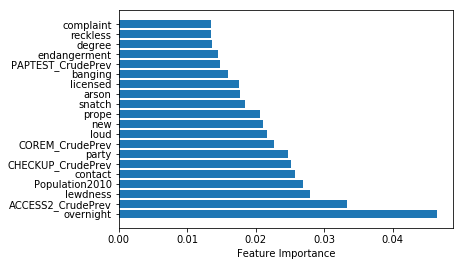

In [73]:
top20features = features_with_weight[:20]
plt.barh([x[0] for x in top20features], [x[1] for x in top20features])
plt.xlabel('Feature Importance')
plt.show()

In [74]:
from sklearn.svm import SVC

In [75]:
svm_pipeline_no_pca = imbPipeline([('oversample', SMOTE(random_state=2)), ('clf', SVC(random_state=2))])
#svm_pipeline = imbPipeline([('PCA', PCA(n_components=.95)), ('oversample', SMOTE(random_state=2)), ('clf', SVC(random_state=2))])

In [77]:
param_grid_svm = [
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']}
 ]
gs_svm = GridSearchCV(estimator=svm_pipeline_no_pca,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=10, verbose=2, return_train_score = True)

In [78]:
gs_svm.fit(X, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   4.4s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   5.2s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   4.9s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   5.3s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   5.0s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   4.2s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   4.7s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] ...... clf__C=1, clf__gamma=0.001, clf__kernel=rbf, total=   4.6s
[CV] clf__C=1, clf__gamma=0.001, clf__kernel=rbf .....................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.1min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('oversample', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=2, ratio='auto', svm_estimator=None)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=2, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [98]:
gs_svm.score(X, y)

0.9879310344827587

In [ ]:
svm_preds = gs_svm.predict(X)

In [ ]:
print(confusion_matrix(y, svm_preds))
print(classification_report(y, svm_preds))

In [71]:
from xgboost import XGBClassifier

In [84]:
xgboost_pipeline = imbPipeline([('PCA', PCA(n_components=.95)), ('oversample', SMOTE(random_state=2)), ('clf', XGBClassifier(random_state=2))])

In [91]:
param_grid = {
    "clf__learning_rate": [.05, .1],
    'clf__max_depth': [3, 6, 10],
    'clf__min_child_weight': [1, 5, 10],
    'clf__subsample': [ 0.5, 0.7],
    'clf__n_estimators': [500]
}
gs_xg = GridSearchCV(estimator=xgboost_pipeline, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, return_train_score=True)

In [92]:
gs_xg.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.05, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=3, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.2s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=6, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=1, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.5, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=5, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.5, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.3s
[CV] clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7 


/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   36.5s finished


[CV]  clf__learning_rate=0.1, clf__max_depth=10, clf__min_child_weight=10, clf__n_estimators=500, clf__subsample=0.7, total=   0.4s


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('oversample', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=2, ratio='auto', svm_estimator=None)), ...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__learning_rate': [0.05, 0.1], 'clf__max_depth': [3, 6, 10], 'clf__min_child_weight': [1, 5, 10], 'clf__subsample': [0.5, 0.7], 'clf__n_estimators': [500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [93]:
gs_xg.best_score_

0.7198275862068966

In [94]:
gs_xg.score(X_test, y_test)

/Users/briansrebrenik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7422680412371134

In [ ]:
plot_feature_importances(gs_xg.)